# Twitter Sentiment Analysis for Tweets directed to airlines

## Business

Die Sentiment-Analyse von Tweets bietet Fluggesellschaften Einblicke in die Wahrnehmung ihrer Dienstleistungen durch die Kunden. Diese Erkenntnisse können genutzt werden, um die Kundenzufriedenheit zu erhöhen, das Markenimage zu verbessern, Wettbewerbsvorteile zu erzielen und die Effizienz des Betriebs zu steigern. Unternehmen die schnell auf diese Tweets reagieren können auf die Wünsche der Kunden umgehend eingehen.

## Daten

Der Datensatz enthält Tweets, die an verschiedene Fluggesellschaften gerichtet sind. Das Ziel dieser Analyse ist es, die Stimmung (positiv, neutral oder negativ) der Tweets basierend auf ihrem Inhalt zu klassifizieren. Die Daten haben drei Zielvariable, positiv, neutral und negativ, die Auskunft darüber geben, wie die Stimmung des Tweets eingestuft wurde. Die Merkmale der Tweets umfassen sowohl numerische Variablen (z.B. Anzahl der Retweets) als auch kategoriale Variablen (z.B. Fluggesellschaft, Grund für negative Stimmung).Durch die Analyse dieser Daten können Fluggesellschaften wertvolle Einblicke in die Kundenzufriedenheit und -wahrnehmung gewinnen. 

## Datenvorbereitung

Die Datenvorbereitung beginnt mit dem Laden der Tweets aus einer CSV-Datei, wobei nur die Spalten airlines entiment und text ausgewählt werden. Zunächst werden Duplikate entfernt, um sicherzustellen, dass jeder Tweet nur einmal analysiert wird. Nun werden Sonderzeichen entfernt. Der Text wird in Kleinbuchstaben umgewandelt, um die Konsistenz zu gewährleisten. Anschließend werden Stoppwörter entfernt. Jedes Wort wird dann lemmatisiert, was bedeutet, dass es auf seine Grundform reduziert wird, um verschiedene Flexionsformen eines Wortes zu vereinheitlichen. Der bereinigte Text wird dann in numerische Merkmale umgewandelt. Schließlich werden die Daten in Trainings- und Testsets aufgeteilt, um die Modelle trainieren und evaluieren zu können. Der Trainingsdatensatz wird verwendet, um die Modelle zu trainieren, während der Testdatensatz zur Bewertung der Modellleistung dient. Diese sorgfältige Datenvorbereitung stellt sicher, dass die Tweets in einer Form vorliegen, die für die Sentiment-Analyse optimal geeignet ist.

## Datenmodell

Es wurden verschiedene Datenmodelle verwendet darunter Naive Bayes, Logistic Regression, Support Vector Machine (SVM) und Decision Tree, etc. Die Modelle wurden sowohl mit TF-IDF-Vektorisierung als auch mit CountVectorizer angewendet.

## Evaluation

Die Ergebnisse der verschiedenen Modelle zur Klassifizierung von Airline-Sentiments zeigen eine Anzahl verschiedener Ergebnisse je nach gewähltem Algorithmus und Vektorisierungsverfahren. Bei der Lemmatisierung der Textdaten erzielten die Modelle mit CountVectorizer tendenziell bessere Ergebnisse als mit TF-IDF-Vektorisierung. Insgesamt variieren die Leistungen der Modelle je nach Kombination von Algorithmus und Vektorisierungsverfahren. Logistic Regression und SVM mit CountVectorizer zeigten die konsistent besten Ergebnisse in Bezug auf Genauigkeit und F1-Score, während Naive Bayes und Decision Trees nicht so gut abgeschnitten haben jedoch eine Alternative darstellen. Die Wahl zwischen TF-IDF und CountVectorizer hängt von den spezifischen Merkmalen der Daten und den Leistungszielen ab.

## Umsetzung

Die Sentiment-Analyse könnte in ein Crm-System eingebunden werden um schnelles Feedback der Kunden an die Firma zu regenerieren. Darüber können sehr schnell Anpassungen vorgenommen werden und die Kundenzufriedenheit gesteigert werden. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## First cleaning of the data

In [2]:
raw_data = pd.read_csv('./data/raw_data.csv')
raw_data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [1306]:
data=raw_data[['airline_sentiment','text']]     
data.head()


airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...

In [1307]:
data.describe()

airline_sentiment            text
count              14640           14640
unique                 3           14427
top             negative  @united thanks
freq                9178               6

no null-values
3 sentiments (positive, neutral, negative)
some tweets appear more than once

In [1308]:
data = data.drop_duplicates(subset='text', keep="first")
data.describe()


airline_sentiment                                 text
count              14427                                14427
unique                 3                                14427
top             negative  @VirginAmerica What @dhepburn said.
freq                9080                                    1

## Data Understanding

Wie viele pos / neg / neut?

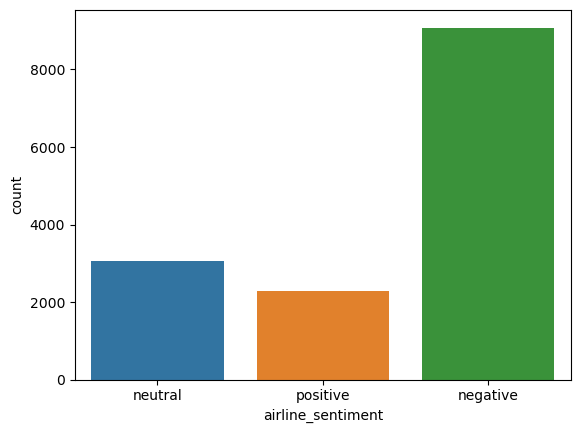

In [1309]:
sns.countplot(x='airline_sentiment', data=data)
plt.show()



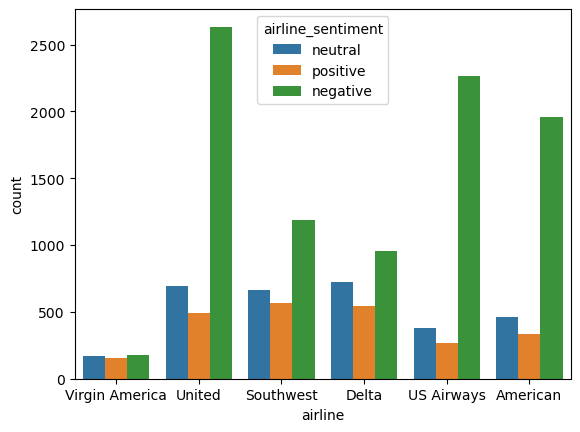

In [1310]:
sns.countplot(x='airline', hue='airline_sentiment', data=raw_data) # raw_data is used to get the airlines back, therefore the duplicates are back as well but will be ignored for the plots as there are only around 200 
plt.show()


### Aufteilung in important und unimportant

Da mehr negative Tweets vorhanden sind, als positive und neutrale besteht die Gefahr, dass im Modell ein Bias entwickelt wird.
1. um das zu verhindern und 
2. da in der Praxis lediglich eine Klassifizierung in wichtig (important) und unwichtig (unimportant) benötigt wird

werden die beiden Labels positiv und neutral als ein gemeinsames Label zusammengefasst.

In [1311]:
data['airline_sentiment'] = data['airline_sentiment'].replace(['negative', 'neutral', 'positive'], ['important', 'unimportant', 'unimportant'])

data.head()

airline_sentiment                                               text
0       unimportant                @VirginAmerica What @dhepburn said.
1       unimportant  @VirginAmerica plus you've added commercials t...
2       unimportant  @VirginAmerica I didn't today... Must mean I n...
3         important  @VirginAmerica it's really aggressive to blast...
4         important  @VirginAmerica and it's a really big bad thing...

In [1312]:
data.describe()

airline_sentiment                                 text
count              14427                                14427
unique                 2                                14427
top            important  @VirginAmerica What @dhepburn said.
freq                9080                                    1

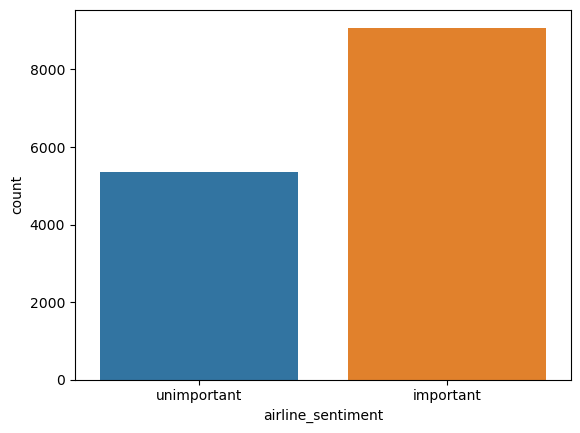

In [1313]:
sns.countplot(x='airline_sentiment', data=data)
plt.show()

In [1314]:
data['tokens'] = data['text'].apply(lambda x: x.split())

words = data['tokens'].apply(pd.Series).stack().unique()
num_words = len(words)
print('There are {} words in the text column.'.format(num_words))


There are 30105 words in the text column.


In [1315]:
cleaned_data = data[['airline_sentiment', 'text']]

def lower_case(input_text):
    return input_text.lower()
def remove_hashtags(input_text):
    return re.sub(r'#\S+', '', input_text)
def remove_mentions(input_text):
    return re.sub(r'@\S+', '', input_text)
def remove_links(input_text):
    return re.sub(r'http\S+', '', input_text)
def clean_texts(input_text):
    return re.sub('[^a-z ]+', '', input_text)

cleaned_data['text'] = cleaned_data['text'].apply(lower_case)
cleaned_data['text'] = cleaned_data['text'].apply(remove_hashtags)
cleaned_data['text'] = cleaned_data['text'].apply(remove_mentions)
cleaned_data['text'] = cleaned_data['text'].apply(remove_links)
cleaned_data['text'] = cleaned_data['text'].apply(clean_texts)
cleaned_data.head()

/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/3589125665.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['text'] = cleaned_data['text'].apply(lower_case)
/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/3589125665.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['text'] = cleaned_data['text'].apply(remove_hashtags)
/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/3589125665.py:16: SettingWithCopyWarning: 
A value is trying

airline_sentiment                                               text
0       unimportant                                         what  said
1       unimportant   plus youve added commercials to the experienc...
2       unimportant   i didnt today must mean i need to take anothe...
3         important   its really aggressive to blast obnoxious ente...
4         important            and its a really big bad thing about it

## Data Preparation for NLP

In [1316]:
#not used yet, only for visualsation of data preparation effects
cleaned_data['tokens'] = cleaned_data['text'].apply(lambda x: x.split())

words_cleaned = cleaned_data['tokens'].apply(pd.Series).stack().unique()
num_words_cleaned = len(words_cleaned)
print('There are {} words in the text column.'.format(num_words_cleaned))

There are 11226 words in the text column.


In [1317]:
cleaned_data.to_csv('./data/cleaned_data.csv', index=False)

### Stop Word Removal

In [1318]:
data_swr = cleaned_data[['airline_sentiment', 'text']]

In [1319]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{'very', 'out', 'have', 'them', 'between', "isn't", 'up', 'd', "weren't", 'a', 'an', 'his', 'after', "shan't", 'until', 'under', 'were', 'her', 'didn', 'yourselves', 'why', "aren't", 'does', 'too', 'but', 'those', 'then', 'whom', 'shan', 'having', 'haven', 'other', 'if', 'at', 'should', 'now', 'when', "didn't", 'in', 'yourself', "don't", 'll', 'being', 'on', "mustn't", "hasn't", "hadn't", 'him', 'not', 'our', 'm', 'was', 't', 'its', 'where', 'few', "wasn't", 'both', 'what', 're', 'wasn', 'my', 'it', 'further', 'once', 'wouldn', 'off', 'had', 'your', 'we', 'own', 'am', 'some', 'are', 'that', 'of', "shouldn't", 'because', 'mustn', 'how', 'their', 'each', 'he', 'by', 'has', 'with', "that'll", "needn't", 'itself', 'here', "haven't", 'there', 'needn', 'doesn', 'ma', 'be', "she's", 'herself', 'mightn', 'they', 've', 'isn', "you've", 'do', 'as', "you'd", 'so', "you're", 'while', 'doing', 'more', 'hers', "should've", 'over', 'the', 'during', "wouldn't", 'myself', 'will', 'did', 'about', 'o', '

[nltk_data] Downloading package stopwords to /Users/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1320]:
def remove_stopwords(input_text):
    return ' '.join([word for word in input_text.split() if word not in stop_words])
data_swr['text'] = data_swr['text'].apply(remove_stopwords) 
data_swr.head()

/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/4206056295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_swr['text'] = data_swr['text'].apply(remove_stopwords)


airline_sentiment                                               text
0       unimportant                                               said
1       unimportant      plus youve added commercials experience tacky
2       unimportant       didnt today must mean need take another trip
3         important  really aggressive blast obnoxious entertainmen...
4         important                               really big bad thing

In [1321]:
#not used yet, only for visualsation of data preparation effects
data_swr['tokens'] = data_swr['text'].apply(lambda x: x.split())

words_after_swr = data_swr['tokens'].apply(pd.Series).stack().unique()
num_words_after_swr = len(words_after_swr)
print('There are {} words in the text column after stop word removal.'.format(num_words_after_swr))

/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/3264614295.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  words_after_swr = data_swr['tokens'].apply(pd.Series).stack().unique()


There are 11094 words in the text column after stop word removal.


In [1322]:
data_swr.to_csv('./data/data_swr.csv', index=False)

### Lemmatization

In [1323]:
data_lem = data_swr[['airline_sentiment', 'text']]

In [1324]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
def lemmatize_text(input_text):
    return ' '.join([lemmatizer.lemmatize(word) for word in input_text.split()])
data_lem['text'] =data_lem['text'].apply(lemmatize_text)
data_lem.head()


[nltk_data] Downloading package wordnet to /Users/simon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/simon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/253529818.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lem['text'] =data_lem['text'].apply(lemmatize_text)


airline_sentiment                                               text
0       unimportant                                               said
1       unimportant       plus youve added commercial experience tacky
2       unimportant       didnt today must mean need take another trip
3         important  really aggressive blast obnoxious entertainmen...
4         important                               really big bad thing

In [1325]:
#not used yet, only for visualsation of data preparation effects
data_lem['tokens'] = data_lem['text'].apply(lambda x: x.split())

words_after_lem = data_lem['tokens'].apply(pd.Series).stack().unique()
num_words_after_lem = len(words_after_lem)
print('There are {} words in the text column after lemmatization.'.format(num_words_after_lem))

/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/2560290298.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  words_after_lem = data_lem['tokens'].apply(pd.Series).stack().unique()


There are 10177 words in the text column after lemmatization.


In [1326]:
data_lem.to_csv('./data/data_lem.csv', index=False)

### Stemming

In [1327]:
data_stem = data_swr[['airline_sentiment', 'text']]

In [1328]:
stemmer = PorterStemmer()
def stem_text(input_text):
    return ' '.join([stemmer.stem(word) for word in input_text.split()])
data_stem['text'] = data_stem['text'].apply(stem_text)
data_stem.head()

/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/491637868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stem['text'] = data_stem['text'].apply(stem_text)


airline_sentiment                                               text
0       unimportant                                               said
1       unimportant                  plu youv ad commerci experi tacki
2       unimportant         didnt today must mean need take anoth trip
3         important  realli aggress blast obnoxi entertain guest fa...
4         important                               realli big bad thing

In [1329]:
#not used yet, only for visualsation of data preparation effects
data_stem['tokens'] = data_stem['text'].apply(lambda x: x.split())

words_after_stem = data_stem['tokens'].apply(pd.Series).stack().unique()
num_words_after_stem = len(words_after_stem)
print('There are {} words in the text column after stemming.'.format(num_words_after_stem))

/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/4164810043.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  words_after_stem = data_stem['tokens'].apply(pd.Series).stack().unique()


There are 8440 words in the text column after stemming.


In [1330]:
data_stem.to_csv('./data/data_stem.csv', index=False)

### Plot to showcase the effectiveness of Data Preparation

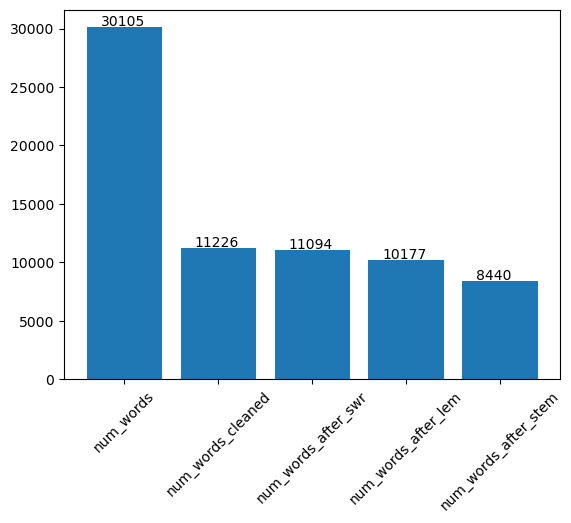

In [1331]:
num_words_list = [num_words, num_words_cleaned, num_words_after_swr, num_words_after_lem, num_words_after_stem]
labels = ['num_words','num_words_cleaned', 'num_words_after_swr', 'num_words_after_lem', 'num_words_after_stem']
plt.bar(labels, num_words_list)
plt.xticks(rotation=45)

for i in range(len(num_words_list)):
    plt.text(x=i-0.25 , y=num_words_list[i]+100, s=num_words_list[i], size=10)
plt.show()



## Different Models 

In [1332]:
results = pd.DataFrame(columns=['model', 'data_prep', 'vectorizer', 'accuracy', 'f1_score', 'precision', 'recall'])

### Lemmatization

##### Train Test Split

In [1333]:
X_train, X_test, y_train, y_test = train_test_split(data_lem['text'], data_lem['airline_sentiment'], test_size=0.2, random_state=42)

#### Feature Extraction

##### TF-IDF

In [1334]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

##### Count Vectorizer

In [1335]:
vectorizer = CountVectorizer()
X_train_countvec = vectorizer.fit_transform(X_train)
X_test_countvec = vectorizer.transform(X_test)

##### Naive Bayes

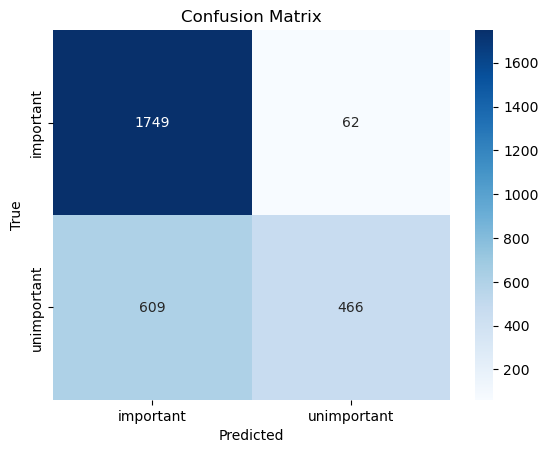

Naive Bayes - Lemmatization - TF-IDF: 
 Accuracy: 0.7674982674982676 
 F1-Score: 0.710229994222574 
 Precision: 0.8121530187369882 
 Recall: 0.6996265714689303


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/293426499.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Naive Bayes', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1336]:
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = nb_model_tfidf.predict(X_test_tfidf)

train_accuracy = nb_model_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Naive Bayes', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Naive Bayes - Lemmatization - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

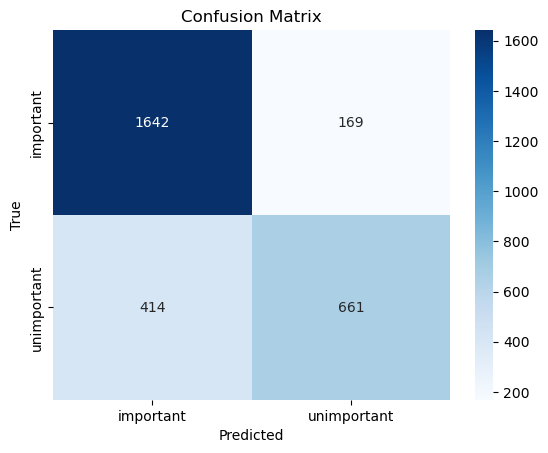

Naive Bayes - Lemmatization - CountVectorizer: 
 Accuracy: 0.797990297990298 
 F1-Score: 0.7716001946614702 
 Precision: 0.7975118372321973 
 Recall: 0.7607825562133217


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/1768884348.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Naive Bayes', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1337]:
nb_model_countvec = MultinomialNB()
nb_model_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = nb_model_countvec.predict(X_test_countvec)

train_accuracy = nb_model_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Naive Bayes', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Naive Bayes - Lemmatization - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

##### Logistic Regression

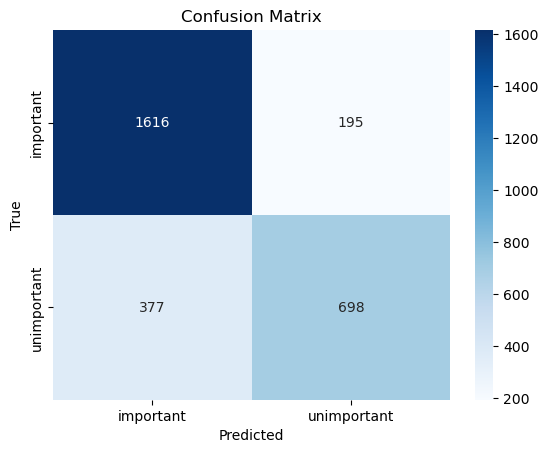

Softmax Regression - Lemmatization - TF-IDF: 
 Accuracy: 0.8018018018018018 
 F1-Score: 0.7794907799235721 
 Precision: 0.7962364355872654 
 Recall: 0.770813504038627


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/1326302266.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Logistic Regression', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1338]:
logreg_tfidf = LogisticRegression()
logreg_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)

train_accuracy = logreg_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Logistic Regression', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Softmax Regression - Lemmatization - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

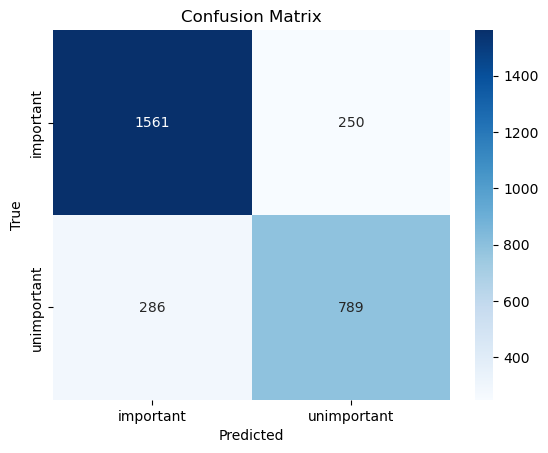

Softmax Regression - Lemmatization - CountVectorizer: 
 Accuracy: 0.8142758142758143 
 F1-Score: 0.7999620329051604 
 Precision: 0.80226916368817 
 Recall: 0.7979541047603149


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/1695832958.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Logistic Regression', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1339]:
logreg_countvec = LogisticRegression()
logreg_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = logreg_countvec.predict(X_test_countvec)

train_accuracy = logreg_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Logistic Regression', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Softmax Regression - Lemmatization - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")


##### Support Vector Machine

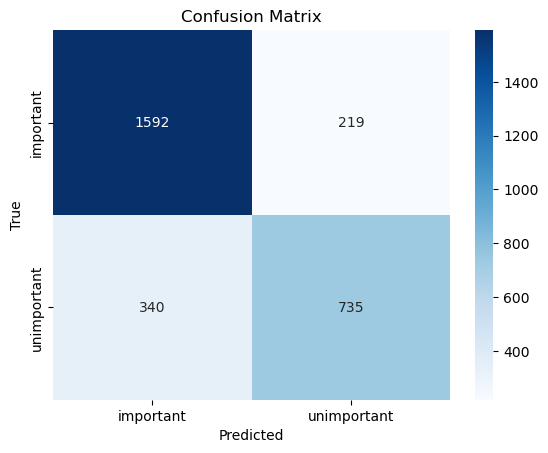

SVM - Lemmatization - TF-IDF: 
 Accuracy: 0.8063063063063063 
 F1-Score: 0.787574690103307 
 Precision: 0.7972284073596625 
 Recall: 0.7813966329793381


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/1110594748.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'SVM', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1340]:
svm_tfidf = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)

train_accuracy = svm_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'SVM', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"SVM - Lemmatization - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

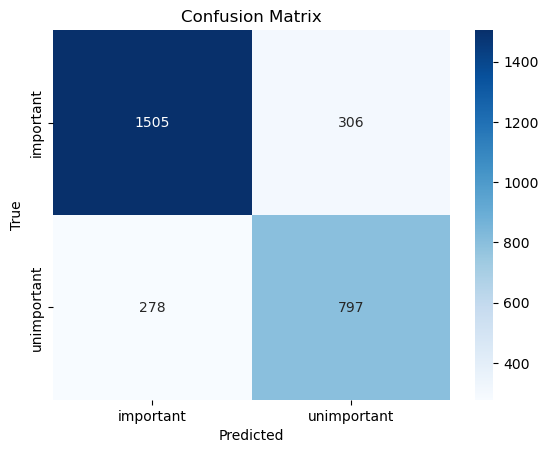

SVM - Lemmatization - CountVectorizer: 
 Accuracy: 0.7976437976437977 
 F1-Score: 0.78468552576915 
 Precision: 0.7833289010901284 
 Recall: 0.7862139637615091


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/2874611548.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'SVM', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1341]:
svm_countvec = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = svm_countvec.predict(X_test_countvec)

train_accuracy = svm_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'SVM', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"SVM - Lemmatization - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

##### Decision Tree

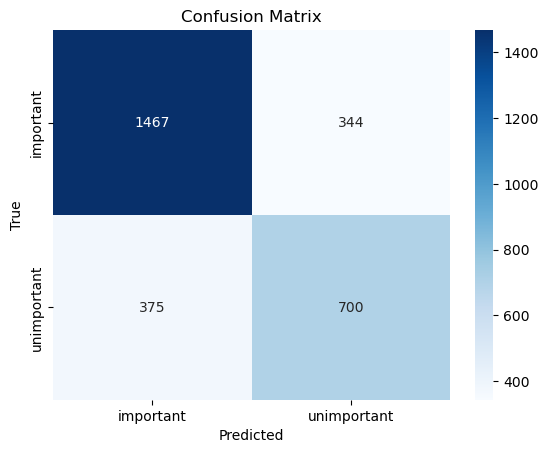

Decision Tree - Lemmatization - TF-IDF: 
 Accuracy: 0.7508662508662509 
 F1-Score: 0.7319322382309522 
 Precision: 0.7334575112009685 
 Recall: 0.7306062434990305


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/3862216708.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Decision Tree', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1342]:
dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = dt_tfidf.predict(X_test_tfidf)

train_accuracy = dt_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Decision Tree', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Decision Tree - Lemmatization - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

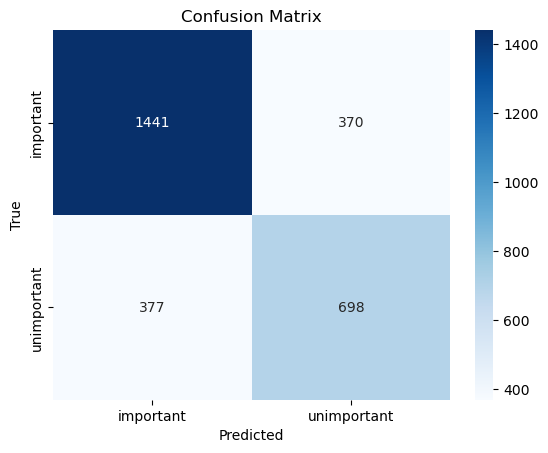

Decision Tree - Lemmatization - CountVectorizer: 
 Accuracy: 0.7411642411642412 
 F1-Score: 0.7227907043728086 
 Precision: 0.7230936576803748 
 Recall: 0.7224976564406149


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/946990368.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Decision Tree', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1343]:
dt_countvec = DecisionTreeClassifier()
dt_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = dt_countvec.predict(X_test_countvec)

train_accuracy = dt_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Decision Tree', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Decision Tree - Lemmatization - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

##### Random Forest

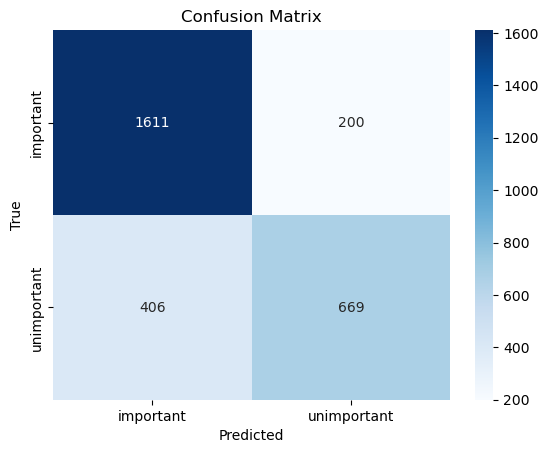

Random Forest - Lemmatization - TF-IDF: 
 Accuracy: 0.7900207900207901 
 F1-Score: 0.7649821974534619 
 Precision: 0.7842806798142143 
 Recall: 0.7559446791570892


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/2378884685.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Random Forest', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1344]:
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)

train_accuracy = rf_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Random Forest', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Random Forest - Lemmatization - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

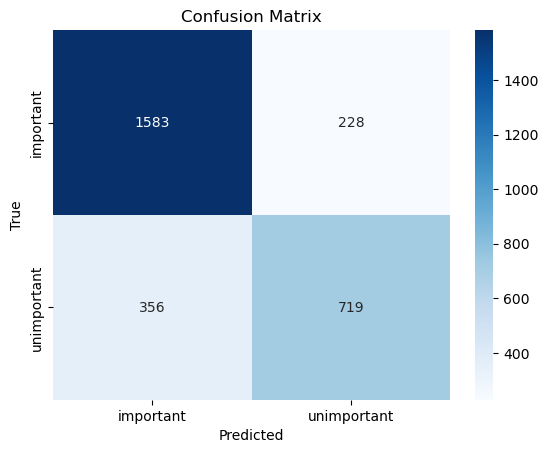

Random Forest - Lemmatization - CountVectorizer: 
 Accuracy: 0.7976437976437977 
 F1-Score: 0.7777218595450051 
 Precision: 0.7878199553106822 
 Recall: 0.7714699574948956


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/1694422822.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Random Forest', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1345]:
rf_countvec = RandomForestClassifier()
rf_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = rf_countvec.predict(X_test_countvec)

train_accuracy = rf_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Random Forest', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Random Forest - Lemmatization - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")


##### Neural Network

/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


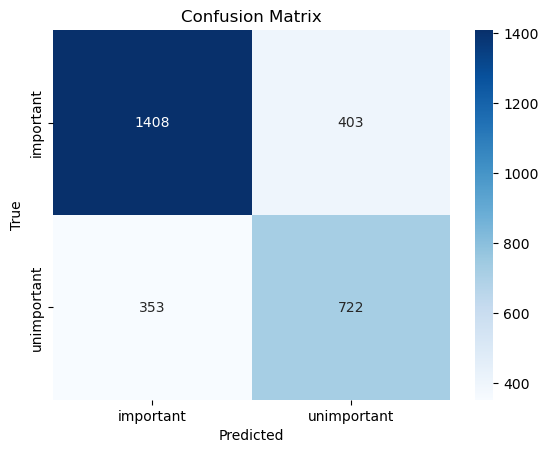

MLP - Lemmatization - TF-IDF: 
 Accuracy: 0.738045738045738 
 F1-Score: 0.7223587498727477 
 Precision: 0.7206617452205186 
 Recall: 0.7245494587340927


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/1450200961.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'MLP', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1346]:
mlp_tfidf = MLPClassifier(hidden_layer_sizes=(5,3))
mlp_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = mlp_tfidf.predict(X_test_tfidf)

train_accuracy = mlp_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'MLP', 'data_prep': 'Lemmatization', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"MLP - Lemmatization - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

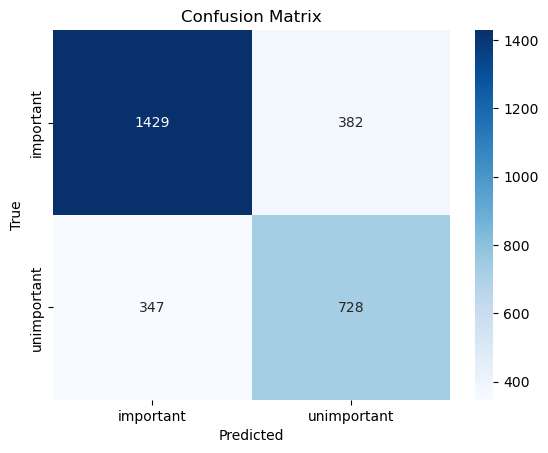

MLP - Lemmatization - CountVectorizer: 
 Accuracy: 0.7474012474012474 
 F1-Score: 0.7315638279344621 
 Precision: 0.7302364864864865 
 Recall: 0.7331380581202728


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/1170759091.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'MLP', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1347]:
mpl_countvec = MLPClassifier(hidden_layer_sizes=(5,3))
mpl_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = mpl_countvec.predict(X_test_countvec)

train_accuracy = mpl_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'MLP', 'data_prep': 'Lemmatization', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"MLP - Lemmatization - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

### Stemming

##### Train Test Split

In [1348]:
X_train, X_test, y_train, y_test = train_test_split(data_stem['text'], data_stem['airline_sentiment'], test_size=0.2, random_state=42)

#### Feature Extraction

##### TF-IDF

In [1349]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

##### Count Vectorizer

In [1350]:
vectorizer = CountVectorizer()
X_train_countvec = vectorizer.fit_transform(X_train)
X_test_countvec = vectorizer.transform(X_test)

#### Modelle

##### Naive Bayes

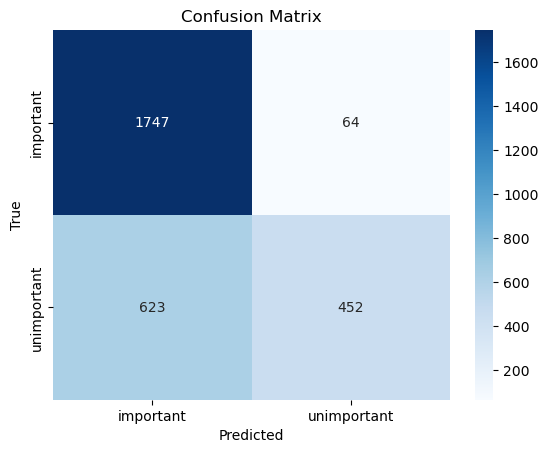

Naive Bayes - Stemming - TF-IDF: 
 Accuracy: 0.761954261954262 
 F1-Score: 0.7019406729223565 
 Precision: 0.8065498969679128 
 Recall: 0.6925627624465476


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/2770012450.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Naive Bayes', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1351]:
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = nb_model_tfidf.predict(X_test_tfidf)

train_accuracy = nb_model_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Naive Bayes', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Naive Bayes - Stemming - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

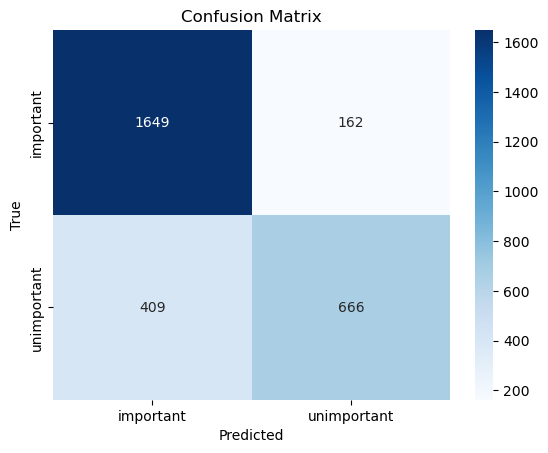

Naive Bayes - Stemming - CountVectorizer: 
 Accuracy: 0.8021483021483021 
 F1-Score: 0.7761820482602391 
 Precision: 0.8028055942874044 
 Recall: 0.7650407715125911


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/3387307148.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Naive Bayes', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1352]:
nb_model_countvec = MultinomialNB()
nb_model_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = nb_model_countvec.predict(X_test_countvec)

train_accuracy = nb_model_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Naive Bayes', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Naive Bayes - Stemming - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

##### Logistic Regression

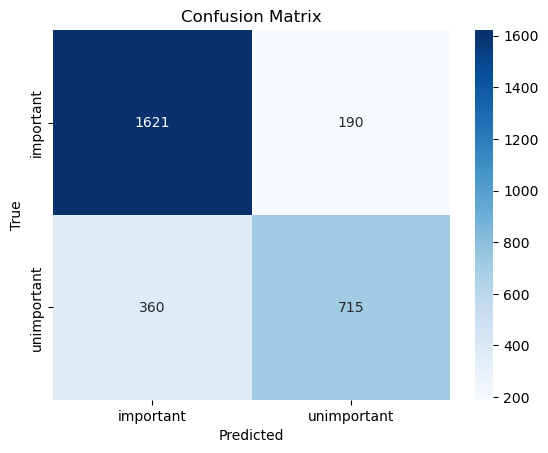

Softmax Regression - Stemming - TF-IDF: 
 Accuracy: 0.8094248094248094 
 F1-Score: 0.7885900140646978 
 Precision: 0.8041644239055559 
 Recall: 0.7801009335713277


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/1974927267.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Logistic Regression', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1353]:
logreg_tfidf = LogisticRegression()
logreg_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)

train_accuracy = logreg_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Logistic Regression', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Softmax Regression - Stemming - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

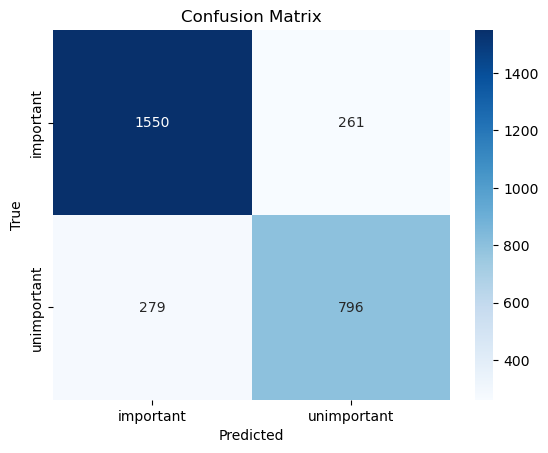

Softmax Regression - Stemming - CountVectorizer: 
 Accuracy: 0.8128898128898129 
 F1-Score: 0.7991825247922809 
 Precision: 0.8002661834741753 
 Recall: 0.798172922579071


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/3367952558.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Logistic Regression', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1354]:
logreg_countvec = LogisticRegression()
logreg_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = logreg_countvec.predict(X_test_countvec)

train_accuracy = logreg_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Logistic Regression', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Softmax Regression - Stemming - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

##### Support Vector Machine

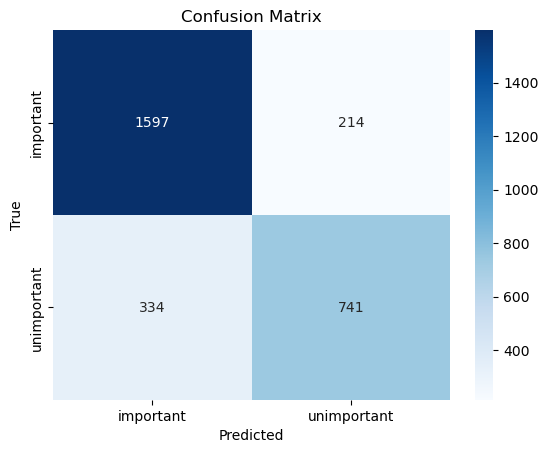

SVM - Stemming - TF-IDF: 
 Accuracy: 0.8101178101178101 
 F1-Score: 0.7918017550742076 
 Precision: 0.8014744279745459 
 Recall: 0.7855677834422714


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/329439752.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'SVM', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1355]:
svm_tfidf = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)

train_accuracy = svm_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'SVM', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"SVM - Stemming - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

In [1356]:
svm_countvec = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = svm_countvec.predict(X_test_countvec)

train_accuracy = svm_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'SVM', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"SVM - Stemming - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

SVM - Stemming - CountVectorizer: 
 Accuracy: 0.799029799029799 
 F1-Score: 0.7847227045088008 
 Precision: 0.7851657475785381 
 Recall: 0.7842939144504514


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/3492794675.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'SVM', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


##### Decision Tree

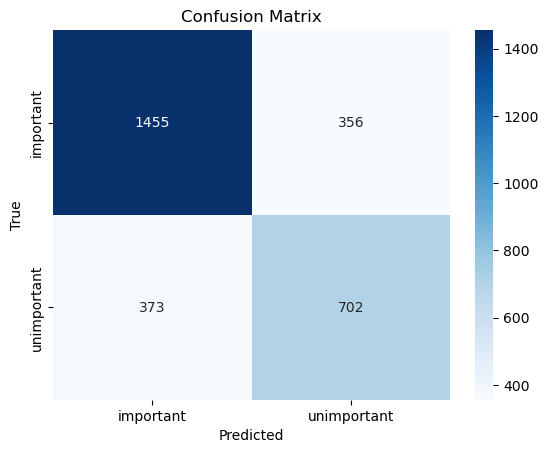

Decision Tree - Stemming - TF-IDF: 
 Accuracy: 0.7474012474012474 
 F1-Score: 0.7289490435889676 
 Precision: 0.7297339640045832 
 Recall: 0.728223389364735


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/3921962064.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Decision Tree', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1357]:
dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = dt_tfidf.predict(X_test_tfidf)

train_accuracy = dt_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Decision Tree', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Decision Tree - Stemming - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

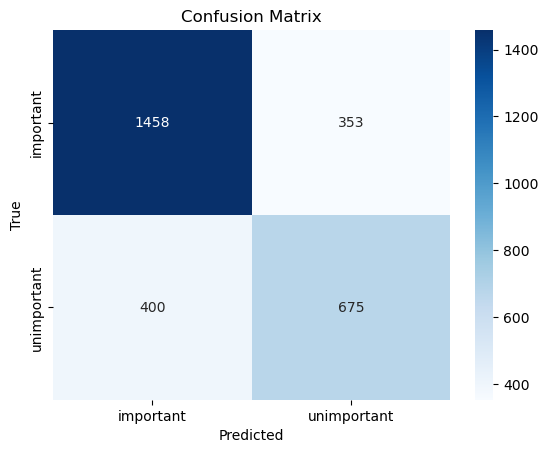

Decision Tree - Stemming - CountVectorizer: 
 Accuracy: 0.739085239085239 
 F1-Score: 0.7183535260339453 
 Precision: 0.7206647665160228 
 Recall: 0.71649352150296


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/2571029836.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Decision Tree', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1358]:
dt_countvec = DecisionTreeClassifier()
dt_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = dt_countvec.predict(X_test_countvec)

train_accuracy = dt_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Decision Tree', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Decision Tree - Stemming - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")


##### Random Forest

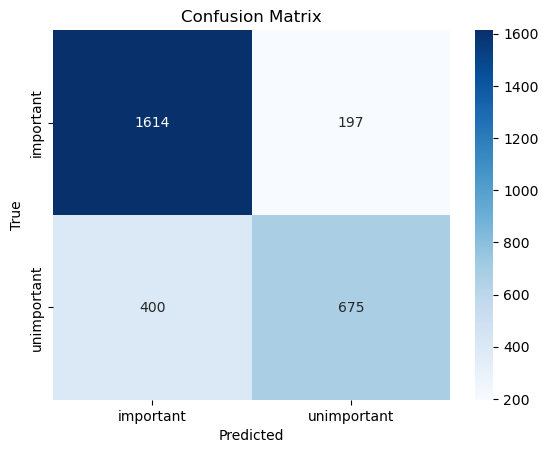

Random Forest - Stemming - TF-IDF: 
 Accuracy: 0.7931392931392931 
 F1-Score: 0.7686479954077163 
 Precision: 0.7877364184652388 
 Recall: 0.7595636485046164


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/4100387705.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Random Forest', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1359]:
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)

train_accuracy = rf_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Random Forest', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Random Forest - Stemming - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

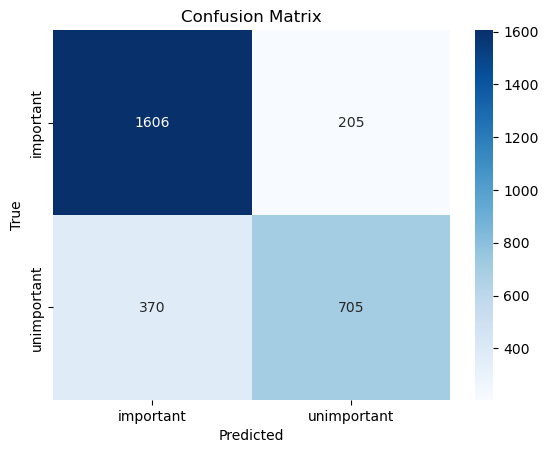

Random Forest - Stemming - CountVectorizer: 
 Accuracy: 0.8007623007623008 
 F1-Score: 0.7792461150735082 
 Precision: 0.7937391555812608 
 Recall: 0.7713084124150862


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/1999871427.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'Random Forest', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1360]:
rf_countvec = RandomForestClassifier()
rf_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = rf_countvec.predict(X_test_countvec)

train_accuracy = rf_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'Random Forest', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"Random Forest - Stemming - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

##### Neural Network

/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


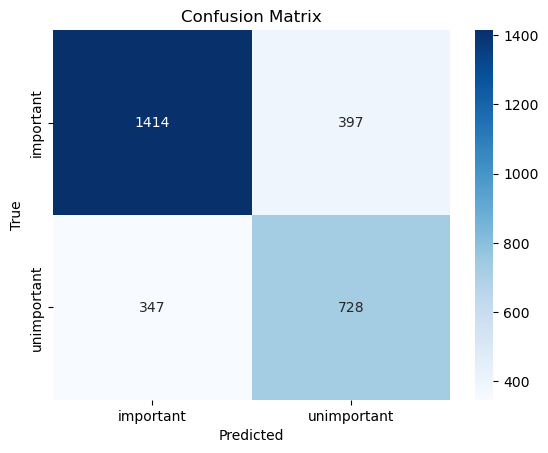

MLP - Stemming - TF-IDF: 
 Accuracy: 0.7422037422037422 
 F1-Score: 0.7267657538430214 
 Precision: 0.7250319893999622 
 Recall: 0.7289966997547288


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/1374425070.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'MLP', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1361]:
mlp_tfidf = MLPClassifier(hidden_layer_sizes=(5,3))
mlp_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = mlp_tfidf.predict(X_test_tfidf)

train_accuracy = mlp_tfidf.score(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, y_pred_tfidf)
f1 = f1_score(y_test, y_pred_tfidf, average='macro')
precision = precision_score(y_test, y_pred_tfidf, average='macro')
recall = recall_score(y_test, y_pred_tfidf, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'MLP', 'data_prep': 'Stemming', 'vectorizer': 'TF-IDF', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"MLP - Stemming - TF-IDF: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

/Users/simon/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


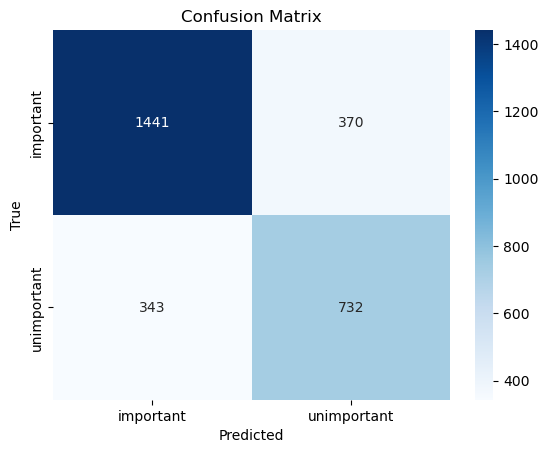

MLP - Stemming - CountVectorizer: 
 Accuracy: 0.7529452529452529 
 F1-Score: 0.7370770279499357 
 Precision: 0.7359911249827058 
 Recall: 0.738311609928987


/var/folders/sy/mt58h6rn57g5vgwg7mlmqhzh0000gn/T/ipykernel_41940/3944810572.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'model': 'MLP', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)


In [1362]:
mlp_countvec = MLPClassifier(hidden_layer_sizes=(5,3)) #hidden_layer_sizes=(100, 100, 100), max_iter=200, alpha=0.0001, solver='sgd', verbose=10, random_state=42, tol=0.000000001
mlp_countvec.fit(X_train_countvec, y_train)

y_pred_countvec = mlp_countvec.predict(X_test_countvec)

train_accuracy = mlp_countvec.score(X_train_countvec, y_train)

accuracy = accuracy_score(y_test, y_pred_countvec)
f1 = f1_score(y_test, y_pred_countvec, average='macro')
precision = precision_score(y_test, y_pred_countvec, average='macro')
recall = recall_score(y_test, y_pred_countvec, average='macro')

labels = ['important', 'unimportant']
cm = confusion_matrix(y_test, y_pred_countvec, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

results = results.append({'model': 'MLP', 'data_prep': 'Stemming', 'vectorizer': 'CountVectorizer', 'train_accuracy': train_accuracy, 'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall}, ignore_index=True)
print(f"MLP - Stemming - CountVectorizer: \n Accuracy: {accuracy} \n F1-Score: {f1} \n Precision: {precision} \n Recall: {recall}")

## Results

In [1363]:
results.to_excel('results.xlsx', index=False)
results

model      data_prep       vectorizer  accuracy  f1_score  \
0           Naive Bayes  Lemmatization           TF-IDF  0.767498  0.710230   
1           Naive Bayes  Lemmatization  CountVectorizer  0.797990  0.771600   
2   Logistic Regression  Lemmatization           TF-IDF  0.801802  0.779491   
3   Logistic Regression  Lemmatization  CountVectorizer  0.814276  0.799962   
4                   SVM  Lemmatization           TF-IDF  0.806306  0.787575   
5                   SVM  Lemmatization  CountVectorizer  0.797644  0.784686   
6         Decision Tree  Lemmatization           TF-IDF  0.750866  0.731932   
7         Decision Tree  Lemmatization  CountVectorizer  0.741164  0.722791   
8         Random Forest  Lemmatization           TF-IDF  0.790021  0.764982   
9         Random Forest  Lemmatization  CountVectorizer  0.797644  0.777722   
10                  MLP  Lemmatization           TF-IDF  0.738046  0.722359   
11                  MLP  Lemmatization  CountVectorizer  0.747401  0.731564   
12          Naive Bayes       Stemming           TF-IDF  0.761954  0.701941   
13          Naive Bayes       Stemming  CountVectorizer  0.802148  0.776182   
14  Logistic Regression       Stemming           TF-IDF  0.809425  0.788590   
15  Logistic Regression       Stemming  CountVectorizer  0.812890  0.799183   
16                  SVM       Stemming           TF-IDF  0.810118  0.791802   
17                  SVM       Stemming  CountVectorizer  0.799030  0.784723   
18        Decision Tree       Stemming           TF-IDF  0.747401  0.728949   
19        Decision Tree       Stemming  CountVectorizer  0.739085  0.718354   
20        Random Forest       Stemming           TF-IDF  0.793139  0.768648   
21        Random Forest       Stemming  CountVectorizer  0.800762  0.779246   
22                  MLP       Stemming           TF-IDF  0.742204  0.726766   
23                  MLP       Stemming  CountVectorizer  0.752945  0.737077   

    precision    recall  train_accuracy  
0    0.812153  0.699627        0.842388  
1    0.797512  0.760783        0.876700  
2    0.796236  0.770814        0.886405  
3    0.802269  0.797954        0.923144  
4    0.797228  0.781397        0.914392  
5    0.783329  0.786214        0.947318  
6    0.733458  0.730606        0.998007  
7    0.723094  0.722498        0.998007  
8    0.784281  0.755945        0.998007  
9    0.787820  0.771470        0.998007  
10   0.720662  0.724549        0.996534  
11   0.730236  0.733138        0.988822  
12   0.806550  0.692563        0.834243  
13   0.802806  0.765041        0.868816  
14   0.804164  0.780101        0.884325  
15   0.800266  0.798173        0.913612  
16   0.801474  0.785568        0.906247  
17   0.785166  0.784294        0.936747  
18   0.729734  0.728223        0.998007  
19   0.720665  0.716494        0.998007  
20   0.787736  0.759564        0.997920  
21   0.793739  0.771308        0.998007  
22   0.725032  0.728997        0.996707  
23   0.735991  0.738312        0.992375